**Advanced Causal Analysis and Visualization: Insights from the Heart Disease Dataset**

Causal Inference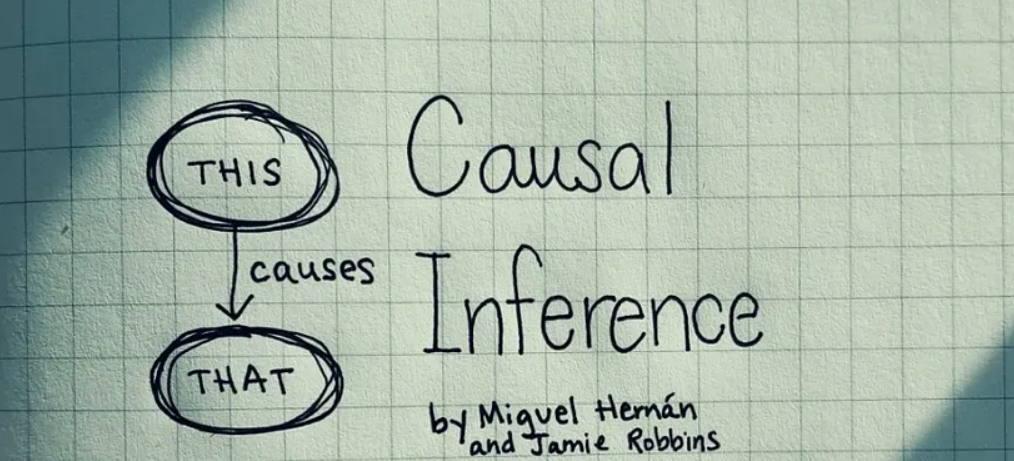






















INFO 7390 Advances Data Sciences and Architecture SEC 03 Fall 2024
Crash Course in Casuality
Shreya Deshpande NUID : 001002875

At the heart of data science lies a fundamental quest: understanding causality. This pursuit goes beyond identifying patterns to uncovering the mechanisms driving relationships between variables. Causality seeks to illuminate how actions lead to consequences, offering insights far more profound than mere correlation.

Imagine a world where each observed event provides a window into an intricate network of cause and effect. Here, grasping the true catalysts of change becomes crucial, guiding us towards impactful interventions and away from misleading associations.

However, the journey to causal understanding is fraught with challenges:

- Observational data's inherent uncertainty, where hidden confounders can distort our perception of reality
- The causal inference dilemma: discerning true effects when only one outcome is observable

To navigate these complexities, we employ an array of causal inference methods. Randomized controlled trials (RCTs) stand out as beacons of experimental rigor, shedding light on causal pathways previously obscured.

Causal inference demands critical thinking, challenging assumptions, and embracing the intricacies of our world. It invites us to delve deeper, uncovering hidden narratives within our data and charting a course towards genuine understanding.

In this exploration, we'll journey together through the theory underpinning causal inference, examine practical applications that bring it to life, and confront the challenges that lie ahead. Join us as we venture into the realm of causality, where every inquiry holds the potential for discovery, and each answer brings us closer to comprehending the world around us.


Methods for Causal Inference
Causal inference methods can be broadly categorized into two main groups based on the type of data available:

1. Experimental Methods:
   - Randomized Controlled Trials (RCTs): Considered the gold standard for establishing causality, particularly in medicine. Subjects are randomly assigned to treatment or control groups, ensuring observed differences in outcomes are attributable to the treatment.
   - Natural Experiments: Exploit situations where external factors create treatment and control groups by chance, allowing causal inferences without direct manipulation of variables.

2. Observational Methods:
   - Instrumental Variables: Address confounding and endogeneity issues by using external factors related to the independent variable but not to unobserved factors.
   - Difference-in-Differences: Compares changes in outcomes between treatment and control groups before and after an intervention.
   - Propensity Score Matching: Matches treated and control units based on their likelihood of receiving treatment, as predicted by observed characteristics.

These methods form a toolkit for researchers to draw causal inferences from various types of data, each with its own strengths and limitations depending on the research context

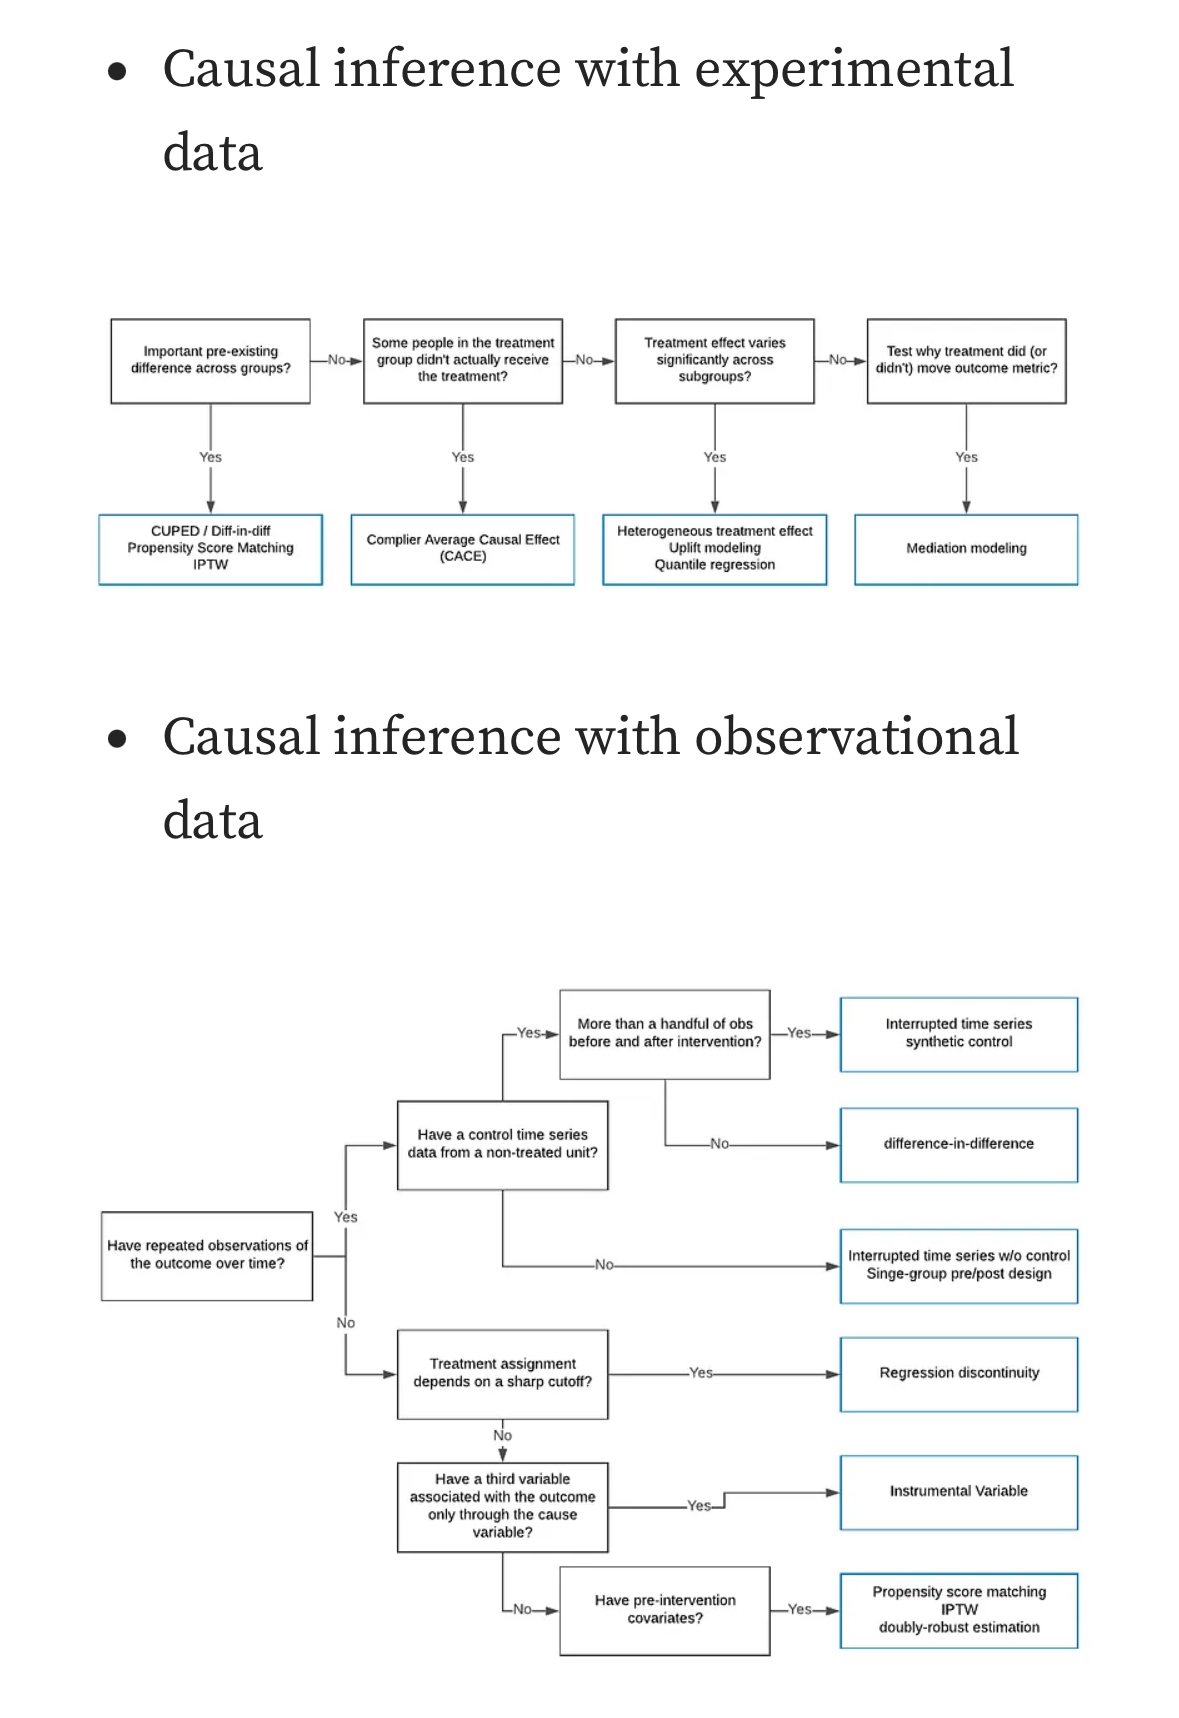


1.
Principles of Causality and DAGs Causal Inference
Causal inference helps distinguish causation from correlation. For example: High cholesterol may correlate with heart disease, but does it cause heart disease? Directed Acyclic Graphs (DAGs) can help identify confounding variables and causal pathways. Directed Acyclic Graphs (DAGs)

DAGs are visual tools for representing causal relationships. Nodes represent variables, and edges represent causal influences. Example: Cholesterol → Heart Disease indicates cholesterol affects heart disease risk. DAGs are acyclic, meaning no loops exist in the graph.

2. Load and Explore Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Load the Heart Disease UCI dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(data_url, names=columns)

# Replace '?' with NaN and convert to numeric
data.replace('?', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')


3. Causal Graphs with NetworkX
Markdown Explanation:

Below, we construct a causal graph (DAG) representing relationships between features in the Heart Disease dataset.
We hypothesize that:
Cholesterol (chol) affects heart disease (target).
Age influences both cholesterol and heart disease risk.
Exercise-induced angina (exang) may mediate between fitness levels and heart disease.

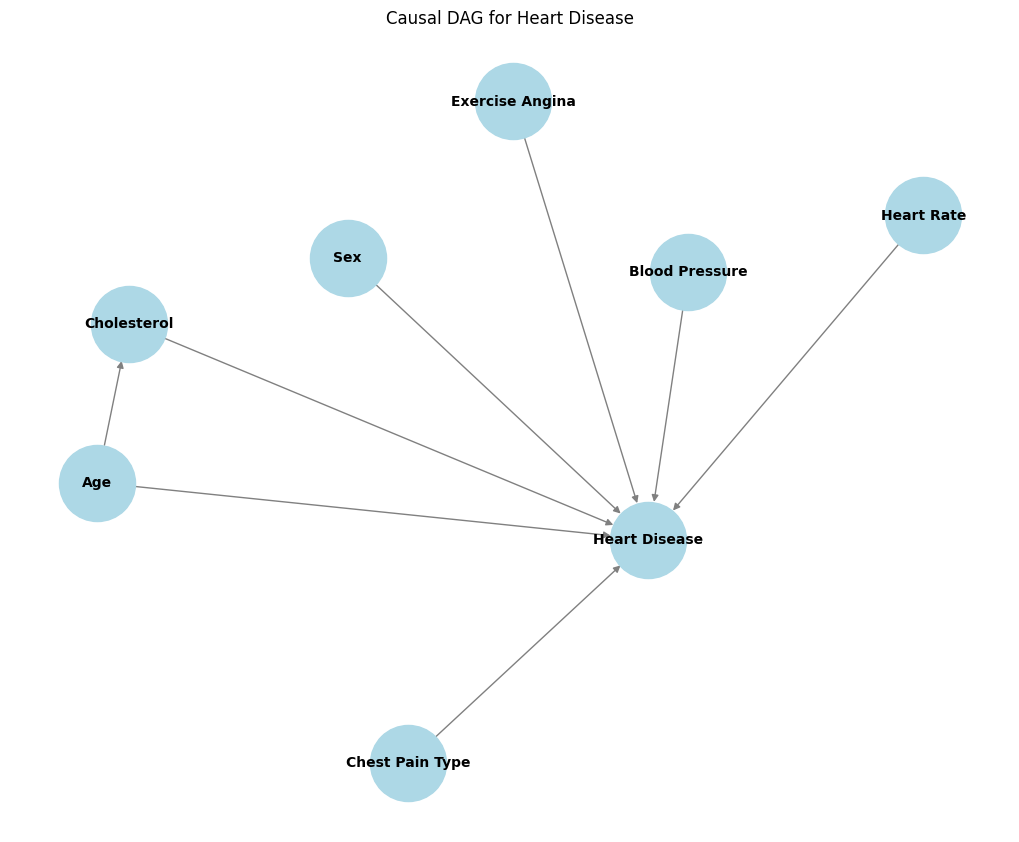

In [ ]:
# Create a DAG representing causal relationships
dag = nx.DiGraph()

# Adding nodes (variables)
dag.add_nodes_from([
    "Age", "Sex", "Chest Pain Type", "Cholesterol", "Blood Pressure",
    "Heart Rate", "Exercise Angina", "Heart Disease"
])

# Adding edges (causal relationships)
dag.add_edges_from([
    ("Age", "Cholesterol"),
    ("Age", "Heart Disease"),
    ("Sex", "Heart Disease"),
    ("Chest Pain Type", "Heart Disease"),
    ("Cholesterol", "Heart Disease"),
    ("Blood Pressure", "Heart Disease"),
    ("Exercise Angina", "Heart Disease"),
    ("Heart Rate", "Heart Disease"),
])

# Draw the DAG
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Causal DAG for Heart Disease")
plt.show()


4. Handle Missing Data
Markdown Explanation:

Missing data can bias causal inference if not handled carefully.
Here, we use median imputation to fill missing values while ensuring the causal relationships remain interpretable.

In [ ]:
# Select relevant features based on the DAG
selected_features = ["age", "sex", "cp", "chol", "trestbps", "thalach", "exang", "target"]
data_selected = data[selected_features]

# Check for missing data
data_selected.isnull().sum()


,0
age,0
sex,0
cp,0
chol,0
trestbps,0
thalach,0
exang,0
target,0


In [ ]:
# Impute missing values with the median
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data_selected), columns=selected_features)

# Verify imputation
data_imputed.isnull().sum()


,0
age,0
sex,0
cp,0
chol,0
trestbps,0
thalach,0
exang,0
target,0


5. Encode Categorical Variables
Markdown Explanation:

Categorical variables like sex and cp (chest pain type) must be encoded for analysis.
One-hot encoding is used to preserve interpretability and causal relationships.

In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
import sklearn

# Check scikit-learn version
print("Scikit-learn version:", sklearn.__version__)

# Use sparse=False for older versions
if sklearn.__version__ >= "1.2":
    encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")
else:
    encoder = OneHotEncoder(sparse=False, drop="first", handle_unknown="ignore")

# Perform encoding
encoded = encoder.fit_transform(data_imputed[categorical_columns])

# Add encoded columns back to the dataset
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
data_encoded = pd.concat([data_imputed.drop(columns=categorical_columns), encoded_df], axis=1)

# Display the updated dataset
data_encoded.head()


Scikit-learn version: 1.0.2


,age,chol,trestbps,thalach,exang,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,233.0,145.0,150.0,0.0,0.0,1.0,0.0,0.0,0.0
1,67.0,286.0,160.0,108.0,1.0,2.0,1.0,0.0,0.0,1.0
2,67.0,229.0,120.0,129.0,1.0,1.0,1.0,0.0,0.0,1.0
3,37.0,250.0,130.0,187.0,0.0,0.0,1.0,0.0,1.0,0.0
4,41.0,204.0,130.0,172.0,0.0,0.0,0.0,1.0,0.0,0.0


6. Correlation vs. Causation
Markdown Explanation:

A correlation heatmap visualizes the relationships between variables.
However, correlation alone cannot confirm causation; causal graphs and domain knowledge are essential.

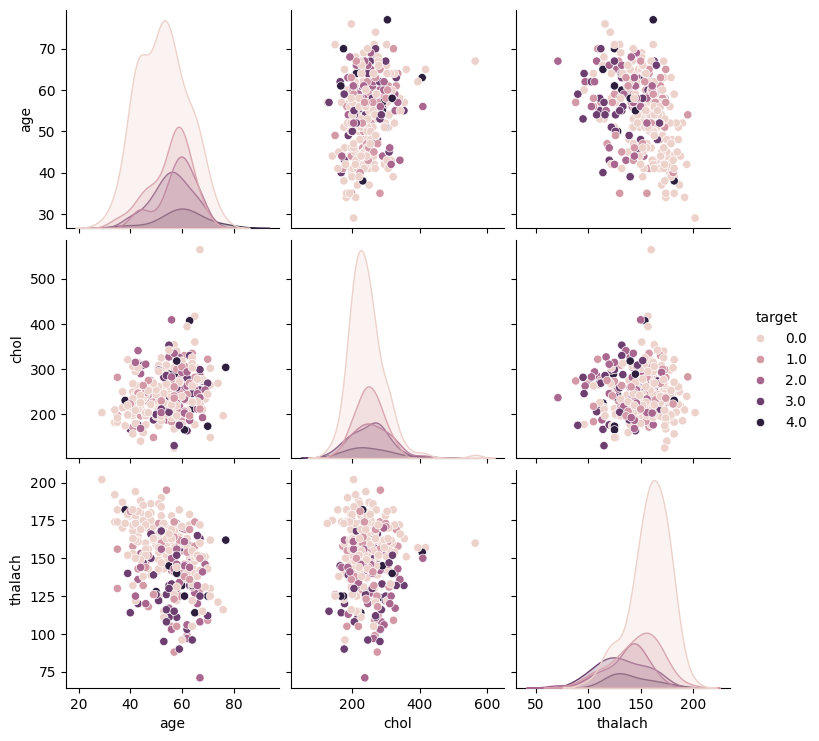

In [ ]:
# Visualize relationships between key features and target
sns.pairplot(data_encoded, vars=["age", "chol", "thalach"], hue="target", diag_kind="kde")
plt.show()


In [ ]:
pip install lingam


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  modifications of the input.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in 

Causal Ordering: ['exang', 'chol', 'target', 'thalach', 'age']


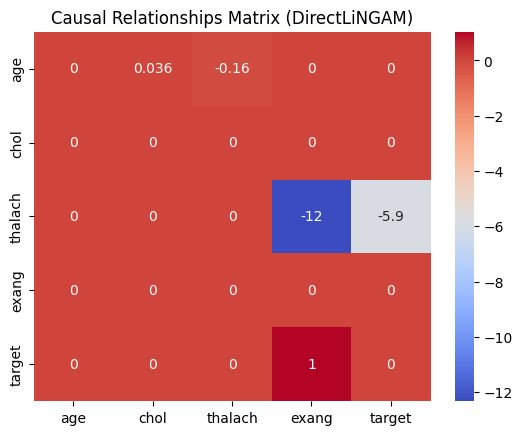

In [ ]:
import pandas as pd
import numpy as np
from lingam import DirectLiNGAM, BootstrapResult
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the dataset by selecting a subset of features
features = ["age", "chol", "thalach", "exang", "target"]
data_lingham = data_encoded[features]

# Apply the DirectLiNGAM algorithm
lingam_model = DirectLiNGAM()
lingam_model.fit(data_lingham)

# Extract causal ordering
causal_order = lingam_model.causal_order_
print("Causal Ordering:", [features[i] for i in causal_order])

# Visualize the causal matrix
causal_matrix = lingam_model.adjacency_matrix_
sns.heatmap(causal_matrix, annot=True, cmap="coolwarm", xticklabels=features, yticklabels=features)
plt.title("Causal Relationships Matrix (DirectLiNGAM)")
plt.show()


**Conclusion**

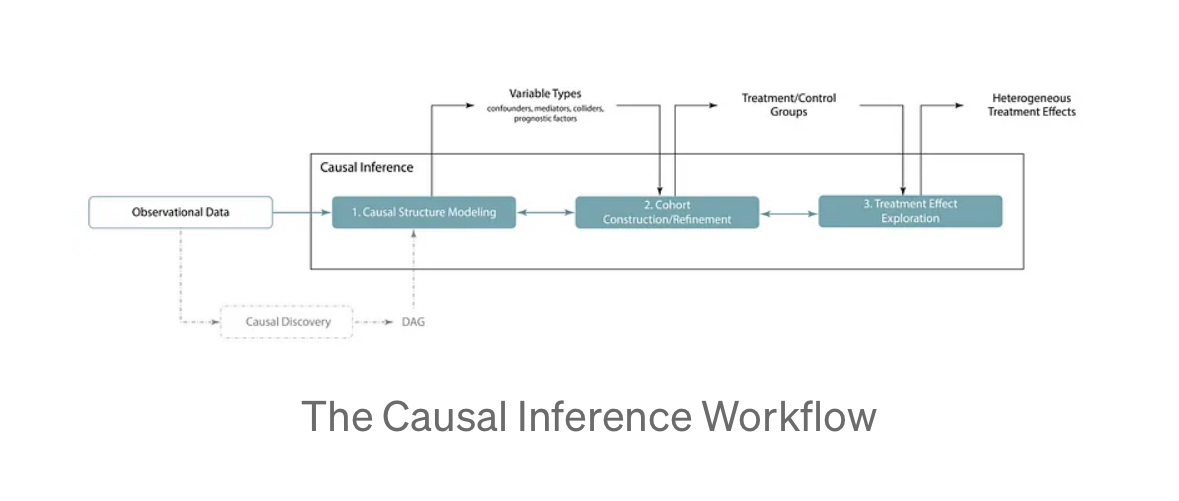Causal ML graphs, also known as causal diagrams or directed acyclic graphs (DAGs), are fascinating graphical representations that help us better understand the causal relationships between variables. Here are some interesting facts about causal ML graphs:

DAGs: Causal ML graphs are directed acyclic graphs, which means that they consist of nodes (representing variables) connected by directed edges (arrows) without any cycles. This structure prevents feedback loops and ensures a clear flow of causality.
Confounder identification: These graphs are extremely useful for identifying confounding variables, which are variables that influence both the cause and the effect, thus creating a spurious relationship between them.
Visualization of assumptions: Causal ML graphs allow researchers to visualize and communicate their causal assumptions explicitly. This clarity helps in assessing the validity of the assumptions and in identifying potential biases in the analysis.
Testable implications: By using causal ML graphs, researchers can identify testable implications, such as conditional independencies, which can help validate the causal assumptions and estimate the causal effects.
Intervention analysis: Causal ML graphs enable researchers to perform “what-if” analyses by simulating interventions on variables, which helps estimate the causal effect of one variable on another under different conditions.
Conclusion
Causality is an intricate and fascinating concept that permeates our understanding of the world. While challenges and limitations exist, the pursuit of causal relationships remains crucial in advancing human knowledge and shaping our decisions. As we continue to explore the tapestry of cause and effect

License
All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.